In [15]:
import pandas as pd
import numpy as np
import warnings 
# 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['target']=pd.Series(iris.target)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 相关性和热力图

In [3]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


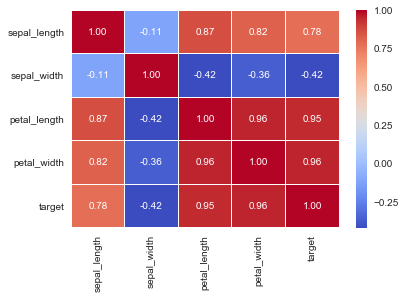

In [8]:
sns.heatmap(round(corr,2), annot=True,cmap="coolwarm",fmt='.2f',linewidths=.05)

从热力图上可以看出，鸾尾花的类别(target)：

- 与花萼长度(sepal length) 弱相关
- 与花萼宽度(sepal width)不相关
- 与花瓣长度(petal length)相关
- 与花瓣宽度(petal width)相关

## 相关关系和配对散点图

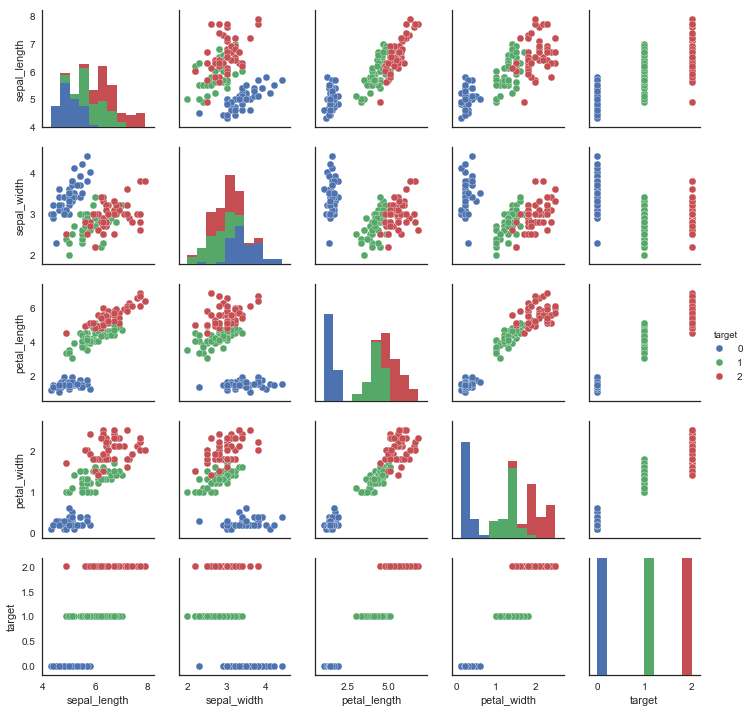

In [11]:
sns.pairplot(df, hue="target", size=2)

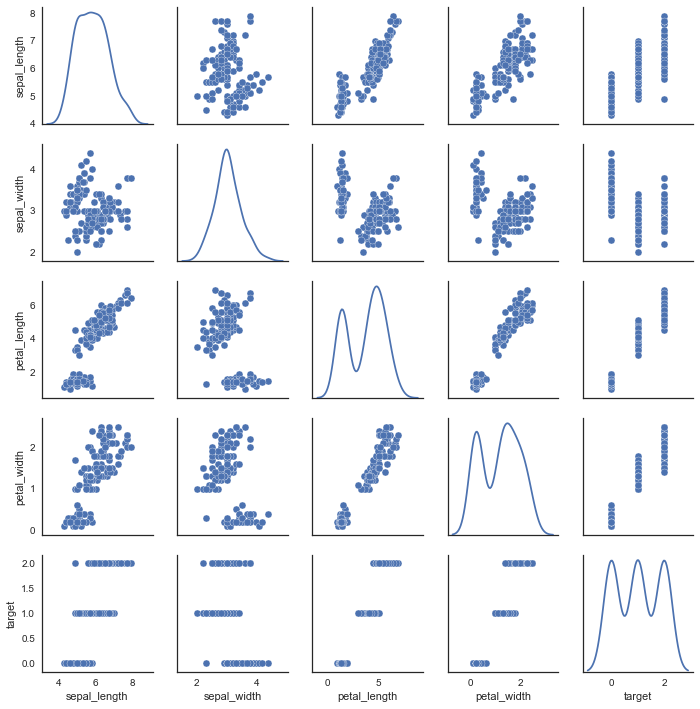

In [17]:
# 也可以用KDE曲线代替
sns.pairplot(df,diag_kind="kde",size=2)

## 平行坐标图

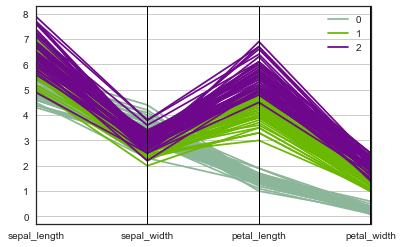

In [20]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, 'target')

如图，sepal_length, sepal_width没有很好的区分类别，而petal_length和petal_witdh明显有按照类别集中的趋势。
而且一般来说：
- petal_length: 类别2 > 类别1 > 类别0
- petal_width: 类别2 > 类别1 > 类别0

### andrews curves

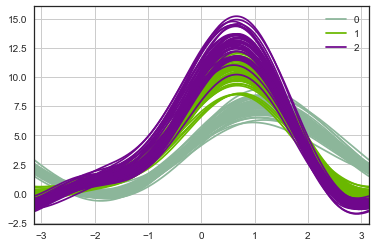

In [21]:
from pandas.tools.plotting import andrews_curves
andrews_curves(df, "target")

## 联合分布图

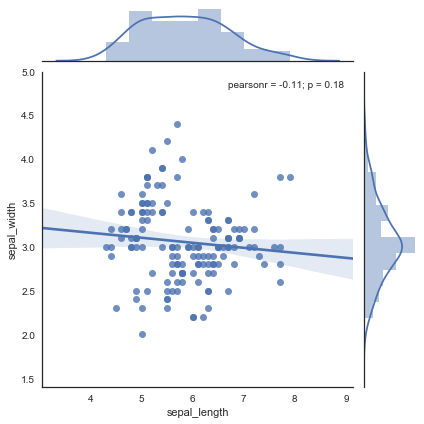

In [7]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, kind='reg', size=6)